## Prerequisites

Run this cell to prepare the environment. This step is obligatory.

In [ ]:
!pip install retentioneering

In [ ]:
import retentioneering
import pandas as pd

The full text of [Cohorts](https://doc.retentioneering.com/stable/doc/user_guides/cohorts.html) user guide is available on the retentioneering website.

# Cohorts

## Cohorts intro

In [ ]:
simple_df = pd.DataFrame(
    [
        [1, "event", "2021-01-28 00:01:00"],
        [2, "event", "2021-01-30 00:01:00"],
        [1, "event", "2021-02-03 00:01:00"],
        [3, "event", "2021-02-04 00:01:00"],
        [4, "event", "2021-02-05 00:01:00"],
        [4, "event", "2021-03-06 00:01:00"],
        [1, "event", "2021-03-07 00:01:00"],
        [2, "event", "2021-03-07 00:01:00"],
        [3, "event", "2021-03-29 00:01:00"],
        [5, "event", "2021-03-30 00:01:00"],
        [4, "event", "2021-04-06 00:01:00"]
        ],
        columns=["user_id", "event", "timestamp"]
)
simple_df

,user_id,event,timestamp
0,1,event,2021-01-28 00:01:00
1,2,event,2021-01-30 00:01:00
2,1,event,2021-02-03 00:01:00
3,3,event,2021-02-04 00:01:00
4,4,event,2021-02-05 00:01:00
5,4,event,2021-03-06 00:01:00
6,1,event,2021-03-07 00:01:00
7,2,event,2021-03-07 00:01:00
8,3,event,2021-03-29 00:01:00
9,5,event,2021-03-30 00:01:00


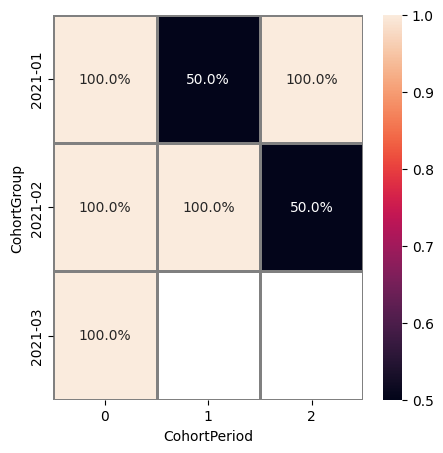

In [ ]:
from retentioneering.eventstream import Eventstream

simple_stream = Eventstream(simple_df)
simple_stream.cohorts(
    cohort_start_unit='M',
    cohort_period=(1, 'M'),
    average=False
)

In [1]:
from retentioneering import datasets

stream = datasets.load_simple_shop()

## Cohort start unit and cohort period

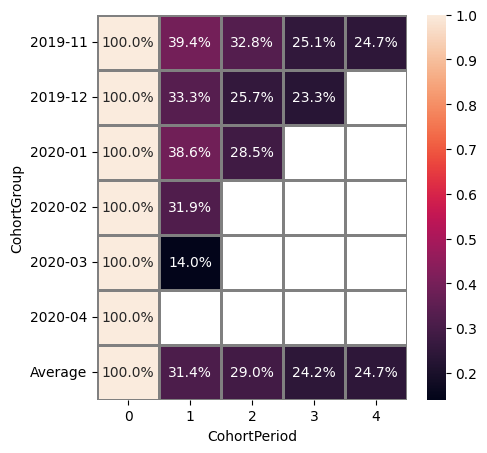

In [ ]:
stream.cohorts(
    cohort_start_unit='M',
    cohort_period=(1, 'M')
);

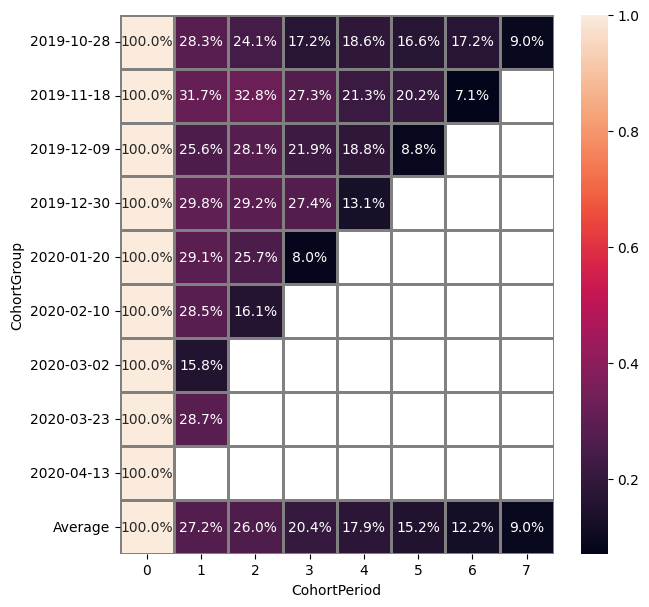

In [2]:
stream.cohorts(
    cohort_start_unit='W',
    cohort_period=(3, 'W'),
    width=7.0, height=7.0
)



Average values
--------------

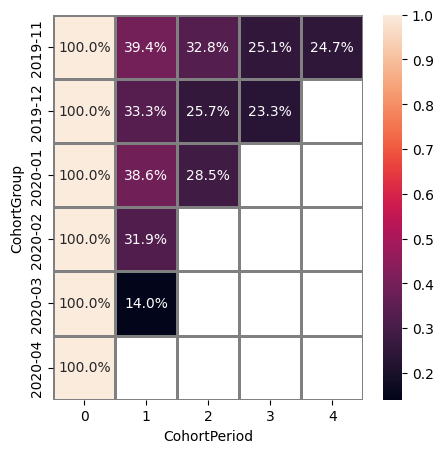

In [ ]:
stream.cohorts(
    cohort_start_unit='M',
    cohort_period=(1, 'M'),
    average=False
)

Cut matrix
----------

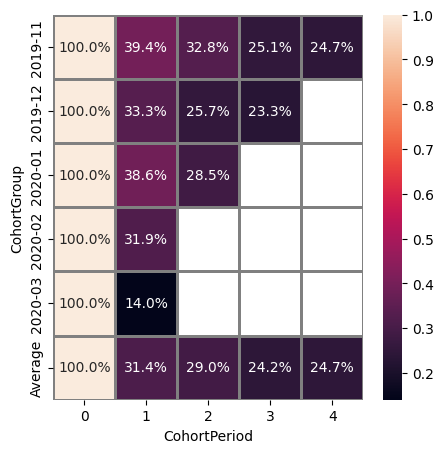

In [ ]:
stream.cohorts(
    cohort_start_unit='M',
    cohort_period=(1, 'M'),
    average=True,
    cut_bottom=1
)

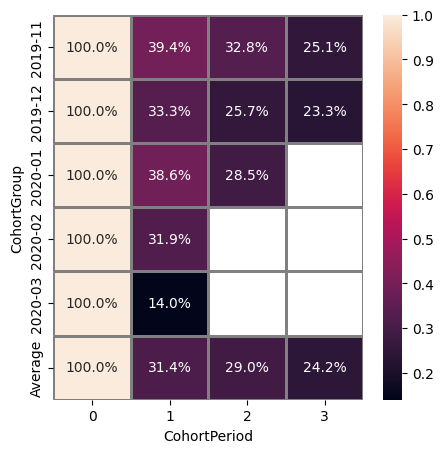

In [ ]:
stream.cohorts(
    cohort_start_unit='M',
    cohort_period=(1, 'M'),
    average=True,
    cut_bottom=1,
    cut_right=1
)

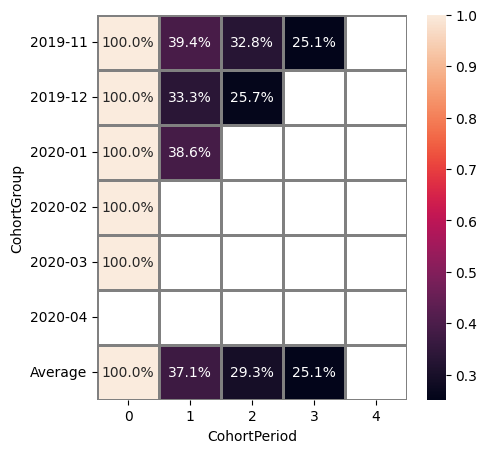

In [ ]:
stream.cohorts(
    cohort_start_unit='M',
    cohort_period=(1, 'M'),
    average=True,
    cut_diagonal=1
)


Using a separate instance
-------------------------

<Axes: xlabel='CohortPeriod', ylabel='CohortGroup'>

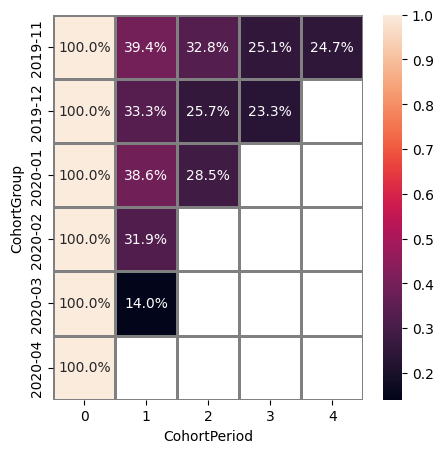

In [ ]:
from retentioneering.tooling.cohorts import Cohorts

cohorts = Cohorts(eventstream=stream)
cohorts.fit(
    cohort_start_unit='M',
    cohort_period=(1, 'M'),
    average=False
)

cohorts.heatmap()

Lineplot
--------

<Axes: xlabel='Period from the start of observation', ylabel='Share of active users'>

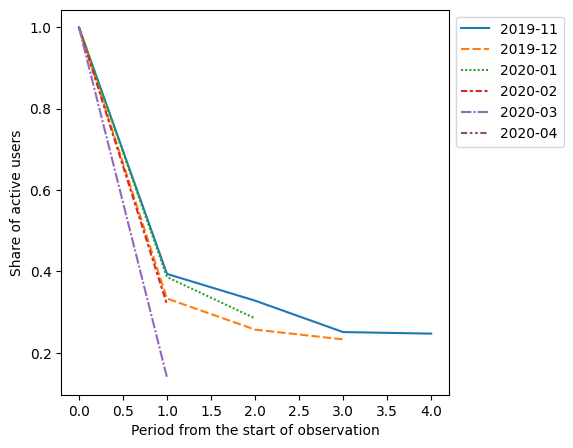

In [ ]:
cohorts.lineplot(width=5, height=5, plot_type='cohorts')

<Axes: xlabel='Period from the start of observation', ylabel='Share of active users'>

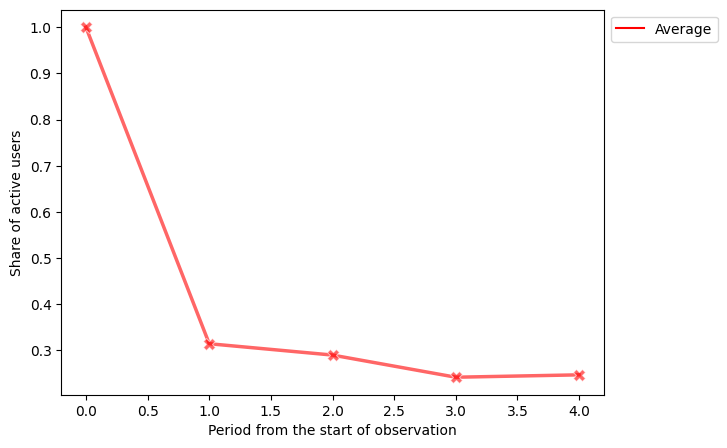

In [ ]:
cohorts.lineplot(width=7, height=5, plot_type='average')

<Axes: xlabel='Period from the start of observation', ylabel='Share of active users'>

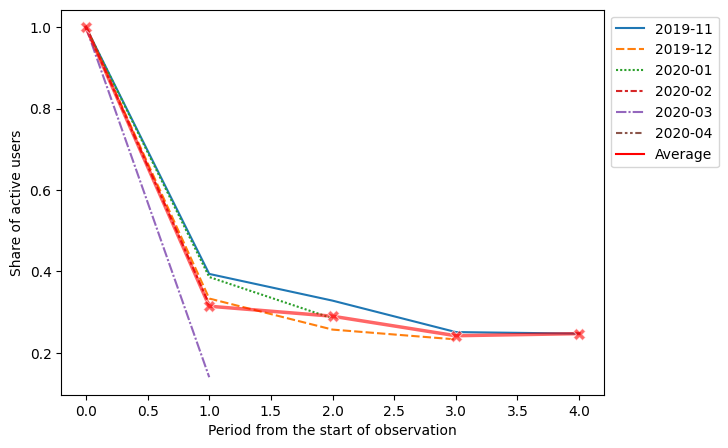

In [ ]:
cohorts.lineplot(width=7, height=5, plot_type='all')

Common tooling properties
-------------------------

### values

In [ ]:
cohorts = stream.cohorts(
    cohort_start_unit='M',
    cohort_period=(1,'M'),
    average=False,
    show_plot=False
)
cohorts.values

CohortPeriod,0,1,2,3,4
CohortGroup,,,,,
2019-11,1.0,0.393822,0.328185,0.250965,0.247104
2019-12,1.0,0.333333,0.257028,0.232932,NaN
2020-01,1.0,0.386179,0.284553,NaN,NaN
2020-02,1.0,0.319066,NaN,NaN,NaN
2020-03,1.0,0.140000,NaN,NaN,NaN
2020-04,1.0,NaN,NaN,NaN,NaN


### params

In [ ]:
cohorts.params

{'cohort_start_unit': 'M',
 'cohort_period': (1, 'M'),
 'average': False,
 'cut_bottom': 0,
 'cut_right': 0,
 'cut_diagonal': 0}